# **Detecting IOT-Botnet Attacks**
This Project aims at classifying the different types of botnets and the
attacks related to those botnets. 
The dataset provides us with the two types of botnets namely Mirai and Bashlite which inturn have two types of attacks of each. 
There is the third type which is known as Benign network, its a safe network and shows that there is no attacks infused by any botnets.
The other attributes list the magnitude, mean, variance, covariance etc of the type of devices and the traffic flowing through them.

The attribute description is as follows - 

    1. H: ("Source IP" in N-BaIoT paper) Stats summarizing the recent traffic from this packet's host (IP)
    2. MI: ("Source MAC-IP" in N-BaIoT paper) Stats summarizing the recent traffic from this packet's host (IP + MAC)
    3. HH: ("Channel" in N-BaIoT paper) Stats summarizing the recent traffic going from this packet's host (IP) to the packet's destination host.
    4. HH_jit: ("Channel jitter" in N-BaIoT paper) Stats summarizing the jitter of the traffic going from this packet's host (IP) to the packet's destination host.
    5. HpHp: ("Socket" in N-BaIoT paper) Stats summarizing the recent traffic going from this packet's host+port (IP) to the packet's destination host+port. Example 192.168.4.2:1242 -> 192.168.4.12:80

Time-frame (The decay factor Lambda used in the damped window): 

	6.  How much recent history of the stream is capture in these statistics
	7.  L5, L3, L1, L0.1 and L0.01
The statistics extracted from the packet stream:

	8. weight: The weight of the stream (can be viewed as the number of items observed in recent history) 9. mean: ...
	9. std: ...
	10. radius: The root squared sum of the two streams' variances
	11. magnitude: The root squared sum of the two streams' means 
	12. cov: An approximated covariance between two streams
	13. pcc: An approximated correlation coefficient between two streams



### **Task 1**
The first task is to mount the drive into google colab and upload the file through it. The data set is very large, hence uploading the file directly to the google colab is not a physible option. Hence, we needed to take this approach.


In [1]:
from google.colab import drive
drive.mount('/content/drive')
root_path = 'gdrive/My Drive/Colab Notebooks'


Mounted at /content/drive


In [63]:
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

### **Task 2**
The next task is to read the data file using the path where it is stored in the google drive. 
Then we just displayed the data frame as it is to figure out how the data set is distributed and what changes can be done. Also the size of the dataset is mentioned at the bottom of the results.

In [64]:
import pandas as pd
df_botnet = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/new.xlsx')
df_botnet

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack,Botnet
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.0000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000,...,1.000000,1.505913e+09,0.000000e+00,1.000000,98.0000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.00000,Scan,Bashlite
1,1.027124,98.000000,1.820000e-12,1.114820,98.000000,1.820000e-12,1.486040,98.000000,0.000000e+00,1.930395,98.000000,0.000000,1.992811,98.000000,0.000000,1.027124,98.000000,1.820000e-12,1.114820,98.000000,1.820000e-12,1.486040,98.000000,0.000000e+00,1.930395,98.000000,0.000000,1.992811,98.000000,0.000000,1.027124,98.0000,0.000001,138.592929,1.820000e-12,0.000000e+00,0.0,1.114820,98.00000,0.000001,...,1.992811,7.502402e+08,5.670000e+17,1.027124,98.0000,0.000001,138.592929,1.820000e-12,0.000000e+00,0.0,1.114820,98.00000,0.000001,138.592929,1.820000e-12,0.000000e+00,0.0,1.486040,98.00000,0.000000e+00,138.592929,0.000000e+00,0.000000e+00,0.0,1.930395,98.000000,0.000002,138.592929,3.640000e-12,0.000000e+00,0.000000e+00,1.992811,98.000000,0.000000,138.592929,0.000000e+00,0.000000e+00,0.00000,Scan,Bashlite
2,1.029968,98.000000,0.000000e+00,1.133728,98.000000,3.640000e-12,1.732886,98.000000,0.000000e+00,2.798650,98.000000,0.000000,2.978774,98.000000,0.000000,1.029968,98.000000,0.000000e+00,1.133728,98.000000,3.640000e-12,1.732886,98.000000,0.000000e+00,2.798650,98.000000,0.000000,2.978774,98.000000,0.000000,1.029968,98.0000,0.000000,138.592929,3.640000e-12,3.280000e-31,0.0,1.133728,98.00000,0.000002,...,2.978774,4.983782e+08,5.020000e+17,1.029968,98.0000,0.000000,138.592929,3.640000e-12,3.280000e-31,0.0,1.133728,98.00000,0.000002,138.592929,4.070000e-12,0.000000e+00,0.0,1.732886,98.00000,0.000000e+00,138.592929,0.000000e+00,0.000000e+00,0.0,2.798650,98.000000,0.000000,138.592929,0.000000e+00,0.000000e+00,0.000000e+00,2.978774,98.000000,0.000000,138.592929,5.460000e-12,0.000000e+00,0.00000,Scan,Bashlite
3,1.338152,74.086423,1.933753e+02,1.581141,77.761456,2.380347e+02,2.386844,84.593174,2.492754e+02,3.736997,89.436975,200.691398,3.972146,89.943902,192.894427,1.338152,74.086423,1.933753e+02,1.581141,77.761456,2.380347e+02,2.386844,84.593174,2.492754e+02,3.736997,89.436975,200.691398,3.972146,89.943902,192.894427,1.000000,66.0000,0.000000,102.941731

### **Task 3**
Then we moved on to search for any missing values. As the results show there are no significant missing values except for the Attack column where there are no attacks generated by the Benign network which is pretty obvious that there won't be any attacks from a safe network. Hence we will continue with this data set.

In [65]:
df_botnet.isna().sum

<bound method DataFrame.sum of         MI_dir_L5_weight  MI_dir_L5_mean  ...  Attack  Botnet
0                  False           False  ...   False   False
1                  False           False  ...   False   False
2                  False           False  ...   False   False
3                  False           False  ...   False   False
4                  False           False  ...   False   False
...                  ...             ...  ...     ...     ...
279732             False           False  ...    True   False
279733             False           False  ...    True   False
279734             False           False  ...    True   False
279735             False           False  ...    True   False
279736             False           False  ...    True   False

[279737 rows x 117 columns]>

### **Task 4**
Next task is **Dimension Reduction**.

In this we created another data frame and picked out the column names which we require for further processes. 

Also in this step we merged few columns with comparable features to make one single column in order to clean the data set and help in visualisation of patterns. Coloumns like mean, variance and covariance of different devices are merged together in one and a mean column of each have been created which contains all the devices and their data.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df_new = df_botnet[['MI_dir_L5_mean','MI_dir_L3_mean','MI_dir_L1_mean','MI_dir_L0.1_mean','MI_dir_L0.01_mean','H_L5_mean','H_L3_mean','H_L1_mean','H_L0.1_mean','H_L0.01_mean','HH_L5_mean','HH_L3_mean','HH_L1_mean','HH_L0.1_mean','HH_L0.01_mean','HH_jit_L5_mean','HH_jit_L3_mean','HH_jit_L1_mean','HH_jit_L0.1_mean','HH_jit_L0.01_mean','HpHp_L5_mean','HpHp_L3_mean','HpHp_L1_mean','HpHp_L0.1_mean','HpHp_L0.01_mean','Attack','Botnet','MI_dir_L5_variance','MI_dir_L3_variance','MI_dir_L1_variance','MI_dir_L0.1_variance','MI_dir_L0.01_variance','H_L5_variance','H_L3_variance','H_L1_variance','H_L0.1_variance','H_L0.01_variance','HH_jit_L0.01_variance','HpHp_L0.1_covariance','HpHp_L1_covariance','HpHp_L3_covariance','HpHp_L5_covariance','HpHp_L0.01_covariance', 'MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'MI_dir_L0.1_weight','MI_dir_L0.01_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight', 'H_L0.1_weight', 'H_L0.01_weight', 'HH_L5_weight', 'HH_L3_weight','HH_L0.01_weight','HH_jit_L5_weight', 'HH_jit_L3_weight','HH_jit_L1_weight', 'HH_jit_L0.1_weight', 'HH_jit_L0.01_weight', 'HpHp_L5_weight', 'HpHp_L3_weight', 'HpHp_L1_weight', 'HpHp_L0.01_weight', 'HpHp_L0.1_weight','HH_L5_pcc','HH_L5_std','HH_L5_radius','HH_L5_pcc','HH_L3_std','HpHp_L5_std','HpHp_L0.01_pcc','HpHp_L0.01_radius']]

In [68]:
df_new['s_mac_ip_mean'] = df_new[['MI_dir_L5_mean', 'MI_dir_L3_mean','MI_dir_L1_mean', 'MI_dir_L0.1_mean','MI_dir_L0.01_mean']].mean(axis=1)
df_new['s_mac_ip_weight'] = df_new[['MI_dir_L5_weight', 'MI_dir_L3_weight','MI_dir_L1_weight', 'MI_dir_L0.1_weight','MI_dir_L0.01_weight']].mean(axis=1)
df_new['s_ip_mean'] = df_new[['H_L5_mean', 'H_L3_mean','H_L1_mean', 'H_L0.1_mean','H_L0.01_mean']].mean(axis=1)
df_new['s_ip_weight'] = df_new[['H_L5_weight', 'H_L3_weight','H_L1_weight', 'H_L0.1_weight','H_L0.01_weight']].mean(axis=1)
df_new['channel_mean'] = df_new[['HH_L5_mean', 'HH_L3_mean','HH_L1_mean', 'HH_L0.1_mean','HH_L0.01_mean']].mean(axis=1)
df_new['channel_weight'] = df_new[['HH_L5_weight', 'HH_L3_weight', 'HH_L0.01_weight']].mean(axis=1)
df_new['channel_jitter_mean'] = df_new[['HH_jit_L5_mean', 'HH_jit_L3_mean','HH_jit_L1_mean', 'HH_jit_L0.1_mean','HH_jit_L0.01_mean']].mean(axis=1)
df_new['channel_jitter_weight'] = df_new[['HH_jit_L5_weight', 'HH_jit_L3_weight','HH_jit_L1_weight', 'HH_jit_L0.1_weight','HH_jit_L0.01_weight']].mean(axis=1)
df_new['socket_mean'] = df_new[['HpHp_L5_mean', 'HpHp_L3_mean','HpHp_L1_mean', 'HpHp_L0.1_mean','HpHp_L0.01_mean']].mean(axis=1)
df_new['socket_weight'] = df_new[['HpHp_L5_weight', 'HpHp_L3_weight', 'HpHp_L1_weight', 'HpHp_L0.01_weight', 'HpHp_L0.1_weight']].mean(axis=1)
df_new['s_mac_ip_var'] = df_new[['MI_dir_L5_variance', 'MI_dir_L3_variance','MI_dir_L1_variance', 'MI_dir_L0.1_variance','MI_dir_L0.01_variance']].mean(axis=1)
df_new['s_ip_var'] = df_new[['H_L5_variance', 'H_L3_variance','H_L1_variance', 'H_L0.1_variance','H_L0.01_variance']].mean(axis=1)
df_new['channel_jitter_var'] = df_new[['HH_jit_L0.01_variance']].mean(axis=1)
df_new['socket_covar'] = df_new[['HpHp_L5_covariance', 'HpHp_L3_covariance','HpHp_L1_covariance', 'HpHp_L0.1_covariance','HpHp_L0.01_covariance']].mean(axis=1)
df_b_traffic = df_new[['s_mac_ip_weight','s_ip_weight','channel_weight','channel_jitter_weight','socket_weight','s_mac_ip_mean','s_ip_mean','channel_mean','channel_jitter_mean','socket_mean','s_mac_ip_var','s_ip_var','channel_jitter_var','socket_covar','HH_L5_pcc','HH_L5_std','HH_L5_radius','HH_L5_pcc','HH_L3_std','HpHp_L5_std','HpHp_L0.01_pcc','HpHp_L0.01_radius','Botnet']]
df_b_traffic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,s_mac_ip_weight,s_ip_weight,channel_weight,channel_jitter_weight,socket_weight,s_mac_ip_mean,s_ip_mean,channel_mean,channel_jitter_mean,socket_mean,s_mac_ip_var,s_ip_var,channel_jitter_var,socket_covar,HH_L5_pcc,HH_L5_pcc,HH_L5_std,HH_L5_radius,HH_L5_pcc,HH_L5_pcc,HH_L3_std,HpHp_L5_std,HpHp_L0.01_pcc,HpHp_L0.01_radius,Botnet
0,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,98.000000,98.000000,1.505913e+09,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,Bashlite
1,1.510238,1.510238,1.378252,1.510238,1.510238,98.000000,98.000000,98.000000,4.326910e+08,98.000000,7.280000e-13,7.280000e-13,5.670000e+17,0.000000e+00,0.0,0.0,0.000001,1.820000e-12,0.0,0.0,0.000001,0.000001,0.00000,0.000000e+00,Bashlite
2,1.934801,1.934801,1.714157,1.934801,1.934801,98.000000,98.000000,98.000000,2.385207e+08,98.000000,7.280000e-13,7.280000e-13,5.020000e+17,6.560000e-32,0.0,0.0,0.000000,3.640000e-12,0.0,0.0,0.000002,0.000000,0.00000,5.460000e-12,Bashlite
3,2.603056,2.603056,1.000000,1.000000,1.000000,83.164386,83.164386,66.000000,1.505913e+09,66.000000,2.148543e+02,2.148543e+02,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,Bashlite
4,3.591804,3.591804,1.989462,1.992803,1.992803,80.942697,80.942697,70.014503,7.502263e+08,70.014503,1.700081e+02,1.700081e+02,5.670000e+17,0.000000e+00,0.0,0.0,3.999802,1.599842e+01,0.0,0.0,3.999929,3.999802,0.00000,1.600000e+01,Bashlite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279732,6.861432,6.861432,2.564847,1.981051,1.578839,86.626506,86.626506,87.972917,4.412221e+05,89.613742,6.962383e+01,6.962383e+01,3.379640e+15,-7.892807e-02,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,-0.09502,5.420919e+01,benign
279733,5.704241,5.704241,2.381466,1.871432,1.871432,67.679422,67.679422,60.000000,3.690988e+05,60.000000,1.007372e+02,1.007372e+02,2.827820e+15,-3.622000e-30,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,1.360000e-12,benign
279734,4.160881,4.160881,2.240282,1.753673,1.000000,63.827886,63.827886,60.000000,2.909359e+05,60.000000,5.713669e+01,5.713669e+01,2.229380e+15,0.000000e+00,0.0,0.0,0.000000,4.550000e-13,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,benign
279735,5.154535,5.154535,1.000000,1.000000,1.000000,68.699908,68.699908,73.000000,1.534247e+09,73.000000,7.985398e+01,7.985398e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,benign


### **Task 5**
In this step respective mean, median and mode of the newly formed columns have been computed to guage the distribution more accurately.

In [69]:
print("Mean value:",df_new['s_mac_ip_mean'].mean()) 
print("Median value:",df_new['s_mac_ip_mean'].median()) 
print("Mode:",df_new['s_mac_ip_mean'].mode()) 
print("Mean value:",df_new['s_ip_mean'].mean()) 
print("Median value:",df_new['s_ip_mean'].median()) 
print("Mode:",df_new['s_ip_mean'].mode()) 
print("Mean value:",df_new['s_mac_ip_var'].mean()) 
print("Median value:",df_new['s_mac_ip_var'].median()) 
print("Mode:",df_new['s_mac_ip_var'].mode()) 
print("Mean value:",df_new['s_ip_var'].mean()) 
print("Median value:",df_new['s_ip_var'].median()) 
print("Mode:",df_new['s_ip_var'].mode()) 
print("Mean value:",df_new['channel_mean'].mean()) 
print("Median value:",df_new['channel_mean'].median()) 
print("Mode:",df_new['channel_mean'].mode()) 
print("Mean value:",df_new['channel_jitter_mean'].mean()) 
print("Median value:",df_new['channel_jitter_mean'].median()) 
print("Mode:",df_new['channel_jitter_mean'].mode()) 
print("Mean value:",df_new['socket_mean'].mean()) 
print("Median value:",df_new['socket_mean'].median()) 
print("Mode:",df_new['socket_mean'].mode()) 
print("Mode:",df_new['Botnet'].mode()) 

Mean value: 145.5725204870334
Median value: 74.413178148
Mode: 0    90.0
dtype: float64
Mean value: 145.57205991491546
Median value: 74.413178148
Mode: 0    90.0
dtype: float64
Mean value: 16786.187178982236
Median value: 89.9314306698
Mode: 0    1.818000e-13
dtype: float64
Mean value: 16786.226802061785
Median value: 89.93371085460001
Mode: 0    1.818000e-13
dtype: float64
Mean value: 146.41651009833691
Median value: 60.0
Mode: 0    60.0
dtype: float64
Mean value: 816881286.6910108
Median value: 1505913204.0
Mode: 0    1.507659e+09
1    1.507659e+09
dtype: float64
Mean value: 146.62517384525572
Median value: 60.0
Mode: 0    60.0
dtype: float64
Mode: 0    Mirai
dtype: object


### **Task 6**
This task is about Correlation of the variables visualised on a heatmap. 

The heatmap below indicates the areas of maximum and least correlated variables with maximum 1 and lowest at 0.4.

As one can see there are correlation values above 0.9 and even 1 in some cases. Hence we will have to drop few attributes in order to remove high correlation.

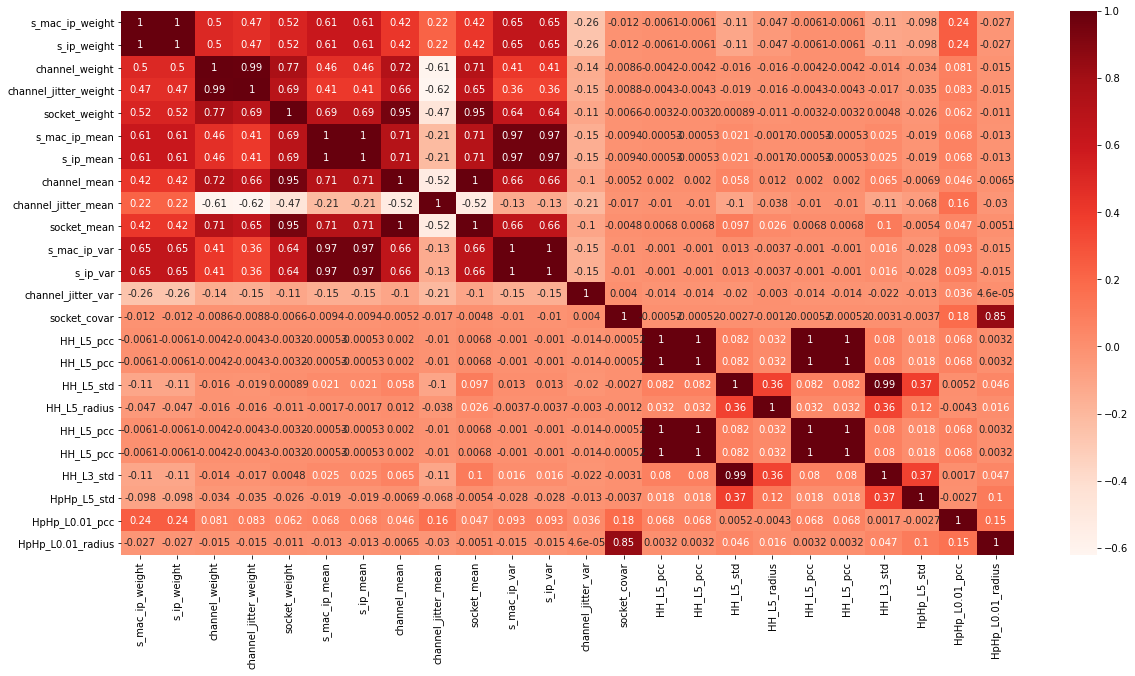

In [70]:
plt.subplots(figsize=(20,10))
sns.heatmap(df_b_traffic.corr(), annot=True, cmap="Reds")

## **Task 7**
Here we are dropping those coloumns which show high correlation among each other. We used the .drop() function in order to drop those columns and get the low values of correlation possible.

In [80]:
df_attack = df_b_traffic.drop(['s_mac_ip_var','s_ip_var','s_ip_mean', 'socket_mean', 's_ip_weight', 'channel_jitter_weight', 'channel_mean','HH_L5_pcc','HH_L5_std','HH_L5_radius','HH_L5_pcc','HH_L3_std','HpHp_L5_std','HpHp_L0.01_pcc','HpHp_L0.01_radius'],axis=1)
df_attack

,s_mac_ip_weight,channel_weight,socket_weight,s_mac_ip_mean,channel_jitter_mean,channel_jitter_var,socket_covar,Botnet
0,1.000000,1.000000,1.000000,98.000000,1.505913e+09,0.000000e+00,0.000000e+00,Bashlite
1,1.510238,1.378252,1.510238,98.000000,4.326910e+08,5.670000e+17,0.000000e+00,Bashlite
2,1.934801,1.714157,1.934801,98.000000,2.385207e+08,5.020000e+17,6.560000e-32,Bashlite
3,2.603056,1.000000,1.000000,83.164386,1.505913e+09,0.000000e+00,0.000000e+00,Bashlite
4,3.591804,1.989462,1.992803,80.942697,7.502263e+08,5.670000e+17,0.000000e+00,Bashlite
...,...,...,...,...,...,...,...,...
279732,6.861432,2.564847,1.578839,86.626506,4.412221e+05,3.379640e+15,-7.892807e-02,benign
279733,5.704241,2.381466,1.871432,67.679422,3.690988e+05,2.827820e+15,-3.622000e-30,benign
279734,4.160881,2.240282,1.000000,63.827886,2.909359e+05,2.229380e+15,0.000000e+00,benign
279735,5.154535,1.000000,1.000000,68.699908,1.534247e+09,0.000000e+00,0.000000e+00,benign


## **Task 8**
The new correlation heatmap represents those columns which show low correlation among each other. This step was taken in order to improve the model performance which will be done below.

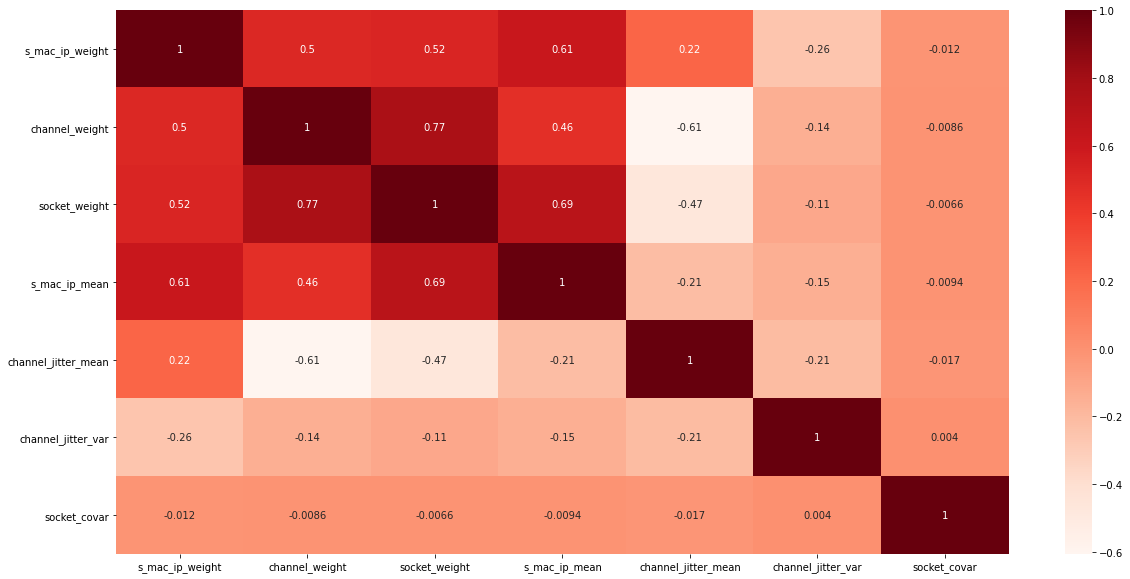

In [72]:
plt.subplots(figsize=(20,10))
sns.heatmap(df_attack.corr(), annot=True, cmap="Reds")

### **Task 9**
This is a histogram plotted for the s_mac_ip_weight column which gives a right skewed plot with beningn having the highest amount of count.

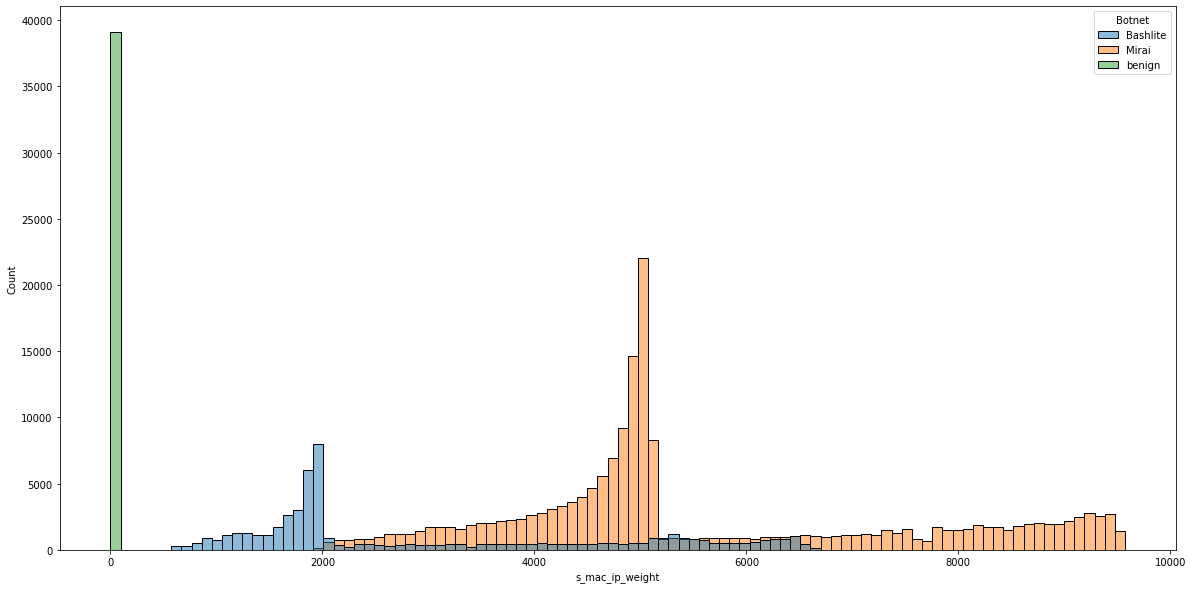

In [73]:
plt.subplots(figsize=(20,10))
sns.histplot(df_attack, x='s_mac_ip_weight', hue = 'Botnet', bins= 100)

### **Task 10**
The outliers are being identified in this step. As one can see there are obvious outliers in Bashlite and Benign attributes. These outliers can be either eliminated or standardized to fit in the readings for future analysis.

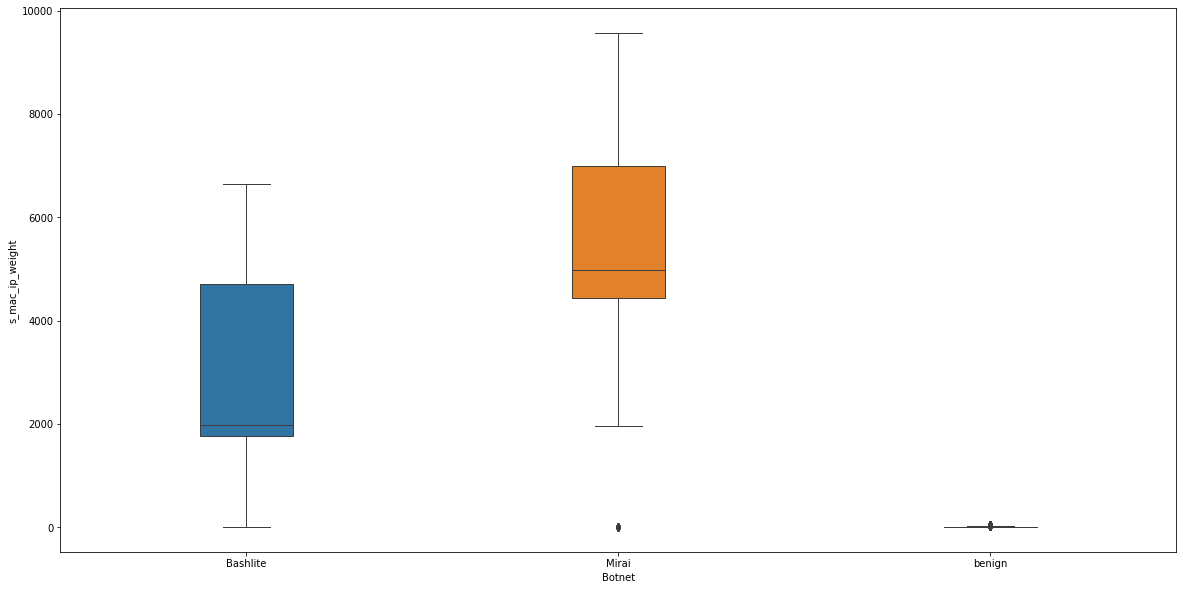

In [74]:
plt.subplots(figsize=(20,10))
sns.boxplot(x = 'Botnet', y='s_mac_ip_weight', data=df_attack , width = 0.25, linewidth = 1)

### **Task 11**
This is the scatter plot which provides the useful relation of the different types of botnets and their relation with the variance of mac ip and standard ip. The scale suggests they almost linearly aligned but further increasing the scale can get few extra deviations as the data is too large for the scale to visualize. 

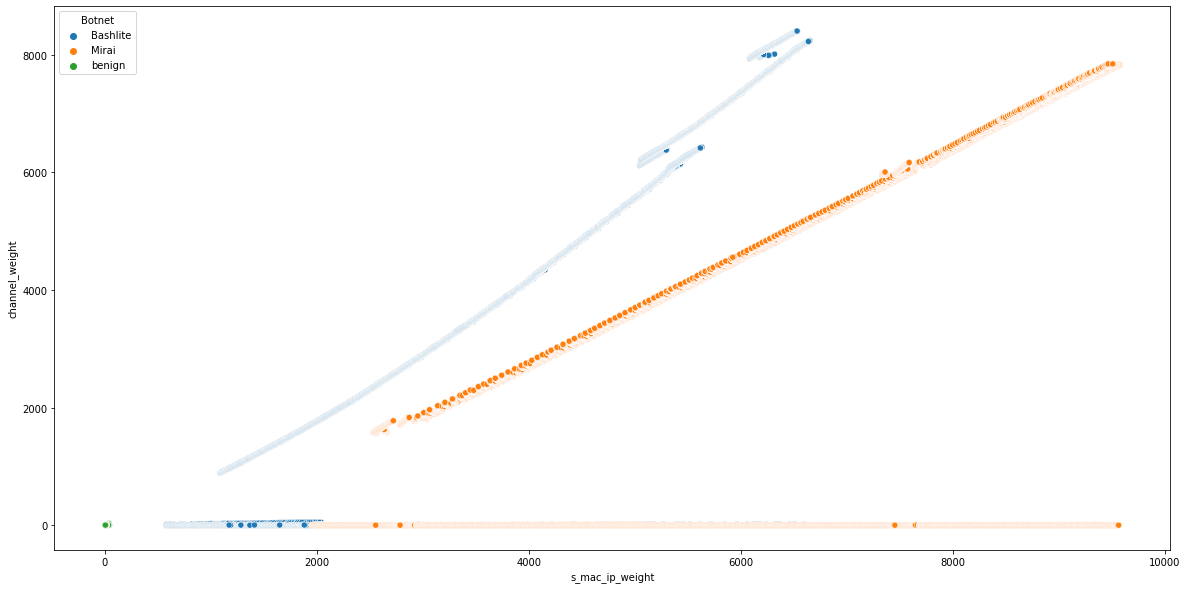

In [75]:
plt.subplots(figsize=(20,10))
sns.scatterplot(data = df_new, x="s_mac_ip_weight", y="channel_weight", hue = 'Botnet')

## **Task 12**
This step involves the mapping of attribute Botnet elements with a numeric value. The string values are converted to 0, 1 and 2 in order to allow the model to be executed in the following step.

As we progressed without mapping, we recieved error saying that the string conversion in not possible with parameters as int. Hence, we used this step.

In [81]:
mymap = {'benign': 0, 'Bashlite': 1, 'Mirai': 2}
df_ab = df_attack.applymap(lambda s: mymap.get(s) if s in mymap else s)
df_ab

,s_mac_ip_weight,channel_weight,socket_weight,s_mac_ip_mean,channel_jitter_mean,channel_jitter_var,socket_covar,Botnet
0,1.000000,1.000000,1.000000,98.000000,1.505913e+09,0.000000e+00,0.000000e+00,1
1,1.510238,1.378252,1.510238,98.000000,4.326910e+08,5.670000e+17,0.000000e+00,1
2,1.934801,1.714157,1.934801,98.000000,2.385207e+08,5.020000e+17,6.560000e-32,1
3,2.603056,1.000000,1.000000,83.164386,1.505913e+09,0.000000e+00,0.000000e+00,1
4,3.591804,1.989462,1.992803,80.942697,7.502263e+08,5.670000e+17,0.000000e+00,1
...,...,...,...,...,...,...,...,...
279732,6.861432,2.564847,1.578839,86.626506,4.412221e+05,3.379640e+15,-7.892807e-02,0
279733,5.704241,2.381466,1.871432,67.679422,3.690988e+05,2.827820e+15,-3.622000e-30,0
279734,4.160881,2.240282,1.000000,63.827886,2.909359e+05,2.229380e+15,0.000000e+00,0
279735,5.154535,1.000000,1.000000,68.699908,1.534247e+09,0.000000e+00,0.000000e+00,0


## **Task 13**
In this step we visualised the most important aspect of our data which is imbalance. We checked the amount of imbalance in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


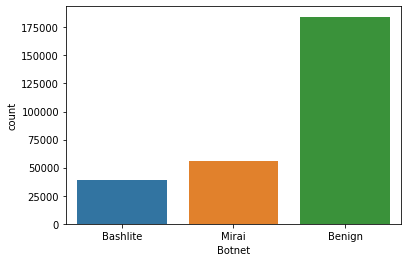

In [82]:
g = sns.countplot(df_ab['Botnet'])
g.set_xticklabels(['Bashlite','Mirai','Benign'])
plt.show()

In [83]:
# class count
class_count_0, class_count_1, class_count_2 = df_ab['Botnet'].value_counts()

# Separate class
class_0 = df_ab[df_ab['Botnet'] == 0]
class_1 = df_ab[df_ab['Botnet'] == 1]
class_2 = df_ab[df_ab['Botnet'] == 2]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

class 0: (39100, 8)
class 1: (56208, 8)
class 2: (184429, 8)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


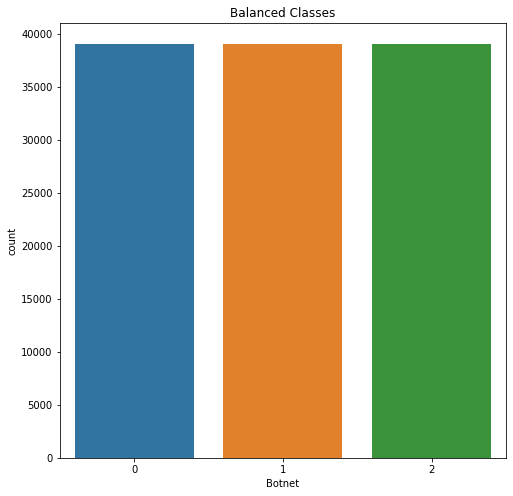

In [84]:
shuffled_df = df_ab.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
bashlite_df = shuffled_df.loc[shuffled_df['Botnet'] == 0]

#Randomly select 492 observations from the non-fraud (majority class)
mirai_df = shuffled_df.loc[shuffled_df['Botnet'] == 1].sample(n=39100,random_state=42)
benign_df = shuffled_df.loc[shuffled_df['Botnet'] == 2].sample(n=39100,random_state=42)

# Concatenate both dataframes again
df_ab = pd.concat([bashlite_df, mirai_df, benign_df])
plt.figure(figsize=(8, 8))
sns.countplot('Botnet', data=df_ab)
plt.title('Balanced Classes')
plt.show()

## **Task 13**
Now we used the sklearn model selection for training and testing our model on our data set. We chose to split our test and train as 30% and 70% respectively. 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(
    df_ab.iloc[:,0:7],df_ab.iloc[:,7], test_size=0.3)

In [86]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
rmse =0
mae =0
Accuracy_score=0
df_read = pd.DataFrame(columns = ['rmse','mae'])
df_read_as = pd.DataFrame(columns = ['Accuracy Score'])
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = df_ab['Botnet']
X_train = df_ab.drop(['Botnet'], axis=1, inplace=False)

#Train the classifier.
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)
mae = mean_absolute_error(y_test, preds)
Accuracy_score= accuracy_score(y_test, preds)
df_read = [rmse, mae]
df_read_as = [Accuracy_score]
print(df_read)
print(" ")
print(df_read_as)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

[0.0, 0.0]
 
[1.0]


## **Task 14**
In this task we used our model and performed Linear Regression on training set. The R square, coefficients and the intercept values are calculated respectively indicating the model performance.

In [87]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('R^2 Value: ', regr.score(X_train,y_train))
print('Coefficients: ',regr.coef_)
print('Intercept:', regr.intercept_)

R^2 Value:  0.893836574846491
Coefficients:  [ 1.76990482e-04 -3.35996367e-06  1.67001192e-04 -5.02630067e-04
  6.18377372e-10  8.08492948e-19  1.88574591e-05]
Intercept: 0.1490411110927813


## **Task 15**
In this task we used sklearn.metrics to test our predicition set and calculated MAE and RMSE values.

In [88]:
from sklearn.metrics import *
pred = regr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test,pred))
print('RMSE: ', mean_squared_error(y_test,pred, squared = False))
print(pred)

MAE:  0.19518623223281314
RMSE:  0.2660944443818445
[0.11553304 0.11201879 0.10419425 ... 1.5279334  0.11384515 2.4001129 ]


## **Task 16**
In this step we implemented the model using the holdout validation method. In this step we experimented on the model performances of Linear Regression, Lasso, Ridge and KNN Regressors.

This shows that KNN regressor has a better performance all over having the lowest RMSE value.

In [89]:
# multiple models with holdout validation
from sklearn import neighbors
from sklearn.metrics import *
mm = pd.DataFrame(columns=['t_model', 'rmse', 'mae'])
index = 0
model = [linear_model.LinearRegression(), 
              linear_model.Lasso(alpha=1),
              linear_model.Ridge(alpha=1),
              neighbors.KNeighborsClassifier(n_neighbors=5)]
for t_o_m in model:
    t_o_m.fit(X_train, y_train)  
    pred = t_o_m.predict(X_test) 
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    mm.loc[index] = [t_o_m, rmse, mae]
    index+=1
mm

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.63186e-32): result may not be accurate.
  overwrite_a=True).T


,t_model,rmse,mae
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.266094,0.195186
1,"Lasso(alpha=1, copy_X=True, fit_intercept=True...",0.266873,0.199923
2,"Ridge(alpha=1, copy_X=True, fit_intercept=True...",0.266095,0.195184
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.163699,0.021341


## **Task** 17
This is another experiment on models using cross validation method. The four models are again put to train and test but this time Linear Regression and Ridge have better performances than the KNN Regressor and and Lasso.


In [90]:
#multiple models with cross validation
from sklearn.model_selection import cross_val_score
mm_cv = pd.DataFrame(columns=['t_model', 'rmse'])
index = 0
model_cv = [linear_model.LinearRegression(), 
              linear_model.Lasso(alpha=1),
              linear_model.Ridge(alpha=1),
              neighbors.KNeighborsClassifier(n_neighbors=5)]
for tom_cv in model_cv:
    scores = cross_val_score(tom_cv, df_ab.iloc[:,0:7], df_ab.iloc[:,7], cv = 5, scoring= 'neg_root_mean_squared_error')
    mm_cv.loc[index] = [tom_cv, np.mean(scores)]
    index+=1
mm_cv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.72565e-32): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.17002e-31): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.02675e-31): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.54415e-32): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.59755e-32): result may not be accurate.
  overwrite_a=True).T


,t_model,rmse
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",-0.310914
1,"Lasso(alpha=1, copy_X=True, fit_intercept=True...",-0.310124
2,"Ridge(alpha=1, copy_X=True, fit_intercept=True...",-0.310863
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",-0.196359


In [91]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                                                       class_weight=None, random_state=None, solver='saga', max_iter=200, multi_class= 'multinomial', 
                                                       verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
for i in range(7, 0, -1):
  X_train = df_ab.iloc[:,0:i]
  y_train = df_ab.iloc[:,7]
  X_test = df_ab.iloc[:,0:i]
  y_test = df_ab.iloc[:,7]
  logreg.fit(X_train,y_train)
  y_pred=logreg.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)

0.5280392156862745
0.5280392156862745


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.3846973572037511


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8537595907928389


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8329411764705882


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8050213128729753
0.6670076726342711


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [93]:
#KNN Classifier Backward predictor
Accuracy_score = 0
logreg = LogisticRegression()
for i in range(7, 0, -1):
  X_train = df_ab.iloc[:,0:i]
  y_train = df_ab.iloc[:,7]
  X_test = df_ab.iloc[:,0:i]
  y_test = df_ab.iloc[:,7]
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = 6)
  kNN_classifier.fit(X_train, y_train)
  pred = kNN_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print(accuracy)

0.9764279624893436
0.9764279624893436
0.9964791133844842
0.9997271952259165
0.9988150042625746
0.9987553282182439
0.9091304347826087


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
#import matplotlib.pyplot as plt  
#from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(
 #   df_ab.iloc[:,0:11],df_ab.iloc[:,11], test_size=0.3)
#clf = SVC(random_state=0)
#clf.fit(X_train, y_train)
#SVC(random_state=0)
#plot_confusion_matrix(clf, X_test, y_test)  
#plt.show()  


Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.80
Macro Recall: 0.67
Macro F1-score: 0.56

Weighted Precision: 0.80
Weighted Recall: 0.67
Weighted F1-score: 0.56

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00     39100
     Class 2       0.89      0.00      0.00     39100
     Class 3       0.50      1.00      0.67     39100

    accuracy                           0.67    117300
   macro avg       0.80      0.67      0.56    117300
weighted avg       0.80      0.67      0.56    117300

[[39094     6     0]
 [   21    47 39032]
 [    1     0 39099]]


In [41]:
# F1 Score
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.5563616162431907


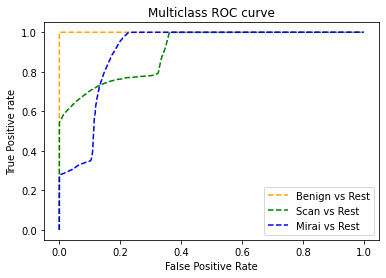

In [96]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    #auc[i] = metrics.roc_auc_score(y_test, pred_prob[:,i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Scan vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Mirai vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [44]:
pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=5))])
pipe_kNN_scaled = Pipeline (steps = [('model',neighbors.KNeighborsClassifier(n_neighbors=16))])
pipe_lr = Pipeline (steps = [ ('model',linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                                                       class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class= 'multinomial', 
                                                       verbose=0, warm_start=False, n_jobs=None, l1_ratio=None))])
pipe_NN = Pipeline (steps = [ ('model',MLPClassifier(learning_rate_init= 0.003, activation= 'relu'))])
pipe_DT = Pipeline (steps = [ ('model',DecisionTreeClassifier(max_depth=3))])
pipe_XG = Pipeline (steps = [('model', XGBClassifier(max_depth=2))])

rmse = 0
mae = 0
Accuracy_score = 0
df_read = pd.DataFrame(columns = ['rmse','mae'])
df_read_as = pd.DataFrame(columns = ['Accuracy Score'])
pipe_list = [pipe_kNN,pipe_kNN_scaled,pipe_lr,pipe_NN,pipe_DT, pipe_XG]
for pipe in pipe_list:
  model = pipe.fit(X_train, y_train)
  pred = model.predict(X_test)
  rmse = mean_squared_error(y_test, pred, squared=False)
  mae = mean_absolute_error(y_test, pred)
  Accuracy_score= accuracy_score(y_test, pred)
  df_read.loc[pipe] = [rmse, mae]
  df_read_as.loc[pipe] = [Accuracy_score]
print(df_read)
print(" ")
print(df_read_as)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


                                                        rmse       mae
(KNeighborsClassifier(algorithm='auto', leaf_si...  0.292285  0.085413
(KNeighborsClassifier(algorithm='auto', leaf_si...  0.310844  0.096607
(LogisticRegression(C=1.0, class_weight=None, d...  0.579943  0.336317
(MLPClassifier(activation='relu', alpha=0.0001,...  0.515158  0.265371
(DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.389843  0.151961
(XGBClassifier(base_score=0.5, booster='gbtree'...  0.324911  0.105550
 
                                                    Accuracy Score
(KNeighborsClassifier(algorithm='auto', leaf_si...        0.914595
(KNeighborsClassifier(algorithm='auto', leaf_si...        0.903402
(LogisticRegression(C=1.0, class_weight=None, d...        0.663691
(MLPClassifier(activation='relu', alpha=0.0001,...        0.734638
(DecisionTreeClassifier(ccp_alpha=0.0, class_we...        0.848048
(XGBClassifier(base_score=0.5, booster='gbtree'...        0.894459


In [110]:
import pandas as pd
df_bot = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/new.xlsx')
df_bot

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack,Botnet
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.0000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000,...,1.000000,1.505913e+09,0.000000e+00,1.000000,98.0000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.00000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.0,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,98.000000,0.000000,98.000000,0.000000e+00,0.000000e+00,0.00000,Scan,Bashlite
1,1.027124,98.000000,1.820000e-12,1.114820,98.000000,1.820000e-12,1.486040,98.000000,0.000000e+00,1.930395,98.000000,0.000000,1.992811,98.000000,0.000000,1.027124,98.000000,1.820000e-12,1.114820,98.000000,1.820000e-12,1.486040,98.000000,0.000000e+00,1.930395,98.000000,0.000000,1.992811,98.000000,0.000000,1.027124,98.0000,0.000001,138.592929,1.820000e-12,0.000000e+00,0.0,1.114820,98.00000,0.000001,...,1.992811,7.502402e+08,5.670000e+17,1.027124,98.0000,0.000001,138.592929,1.820000e-12,0.000000e+00,0.0,1.114820,98.00000,0.000001,138.592929,1.820000e-12,0.000000e+00,0.0,1.486040,98.00000,0.000000e+00,138.592929,0.000000e+00,0.000000e+00,0.0,1.930395,98.000000,0.000002,138.592929,3.640000e-12,0.000000e+00,0.000000e+00,1.992811,98.000000,0.000000,138.592929,0.000000e+00,0.000000e+00,0.00000,Scan,Bashlite
2,1.029968,98.000000,0.000000e+00,1.133728,98.000000,3.640000e-12,1.732886,98.000000,0.000000e+00,2.798650,98.000000,0.000000,2.978774,98.000000,0.000000,1.029968,98.000000,0.000000e+00,1.133728,98.000000,3.640000e-12,1.732886,98.000000,0.000000e+00,2.798650,98.000000,0.000000,2.978774,98.000000,0.000000,1.029968,98.0000,0.000000,138.592929,3.640000e-12,3.280000e-31,0.0,1.133728,98.00000,0.000002,...,2.978774,4.983782e+08,5.020000e+17,1.029968,98.0000,0.000000,138.592929,3.640000e-12,3.280000e-31,0.0,1.133728,98.00000,0.000002,138.592929,4.070000e-12,0.000000e+00,0.0,1.732886,98.00000,0.000000e+00,138.592929,0.000000e+00,0.000000e+00,0.0,2.798650,98.000000,0.000000,138.592929,0.000000e+00,0.000000e+00,0.000000e+00,2.978774,98.000000,0.000000,138.592929,5.460000e-12,0.000000e+00,0.00000,Scan,Bashlite
3,1.338152,74.086423,1.933753e+02,1.581141,77.761456,2.380347e+02,2.386844,84.593174,2.492754e+02,3.736997,89.436975,200.691398,3.972146,89.943902,192.894427,1.338152,74.086423,1.933753e+02,1.581141,77.761456,2.380347e+02,2.386844,84.593174,2.492754e+02,3.736997,89.436975,200.691398,3.972146,89.943902,192.894427,1.000000,66.0000,0.000000,102.941731

In [111]:
df_new1 = df_bot[['MI_dir_L5_mean','MI_dir_L3_mean','MI_dir_L1_mean','MI_dir_L0.1_mean','MI_dir_L0.01_mean','H_L5_mean','H_L3_mean','H_L1_mean','H_L0.1_mean','H_L0.01_mean','HH_L5_mean','HH_L3_mean','HH_L1_mean','HH_L0.1_mean','HH_L0.01_mean','HH_jit_L5_mean','HH_jit_L3_mean','HH_jit_L1_mean','HH_jit_L0.1_mean','HH_jit_L0.01_mean','HpHp_L5_mean','HpHp_L3_mean','HpHp_L1_mean','HpHp_L0.1_mean','HpHp_L0.01_mean','Attack','Botnet','MI_dir_L5_variance','MI_dir_L3_variance','MI_dir_L1_variance','MI_dir_L0.1_variance','MI_dir_L0.01_variance','H_L5_variance','H_L3_variance','H_L1_variance','H_L0.1_variance','H_L0.01_variance','HH_jit_L0.01_variance','HpHp_L0.1_covariance','HpHp_L1_covariance','HpHp_L3_covariance','HpHp_L5_covariance','HpHp_L0.01_covariance', 'MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'MI_dir_L0.1_weight','MI_dir_L0.01_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight', 'H_L0.1_weight', 'H_L0.01_weight', 'HH_L5_weight', 'HH_L3_weight','HH_L0.01_weight','HH_jit_L5_weight', 'HH_jit_L3_weight','HH_jit_L1_weight', 'HH_jit_L0.1_weight', 'HH_jit_L0.01_weight', 'HpHp_L5_weight', 'HpHp_L3_weight', 'HpHp_L1_weight', 'HpHp_L0.01_weight', 'HpHp_L0.1_weight','HH_L5_pcc','HH_L5_std','HH_L5_radius','HH_L5_pcc','HH_L3_std','HpHp_L5_std','HpHp_L0.01_pcc','HpHp_L0.01_radius']]

In [112]:
df_new1['s_mac_ip_mean'] = df_new1[['MI_dir_L5_mean', 'MI_dir_L3_mean','MI_dir_L1_mean', 'MI_dir_L0.1_mean','MI_dir_L0.01_mean']].mean(axis=1)
df_new1['s_mac_ip_weight'] = df_new1[['MI_dir_L5_weight', 'MI_dir_L3_weight','MI_dir_L1_weight', 'MI_dir_L0.1_weight','MI_dir_L0.01_weight']].mean(axis=1)
df_new1['s_ip_mean'] = df_new1[['H_L5_mean', 'H_L3_mean','H_L1_mean', 'H_L0.1_mean','H_L0.01_mean']].mean(axis=1)
df_new1['s_ip_weight'] = df_new1[['H_L5_weight', 'H_L3_weight','H_L1_weight', 'H_L0.1_weight','H_L0.01_weight']].mean(axis=1)
df_new1['channel_mean'] = df_new1[['HH_L5_mean', 'HH_L3_mean','HH_L1_mean', 'HH_L0.1_mean','HH_L0.01_mean']].mean(axis=1)
df_new1['channel_weight'] = df_new1[['HH_L5_weight', 'HH_L3_weight', 'HH_L0.01_weight']].mean(axis=1)
df_new1['channel_jitter_mean'] = df_new1[['HH_jit_L5_mean', 'HH_jit_L3_mean','HH_jit_L1_mean', 'HH_jit_L0.1_mean','HH_jit_L0.01_mean']].mean(axis=1)
df_new1['channel_jitter_weight'] = df_new1[['HH_jit_L5_weight', 'HH_jit_L3_weight','HH_jit_L1_weight', 'HH_jit_L0.1_weight','HH_jit_L0.01_weight']].mean(axis=1)
df_new1['socket_mean'] = df_new1[['HpHp_L5_mean', 'HpHp_L3_mean','HpHp_L1_mean', 'HpHp_L0.1_mean','HpHp_L0.01_mean']].mean(axis=1)
df_new1['socket_weight'] = df_new1[['HpHp_L5_weight', 'HpHp_L3_weight', 'HpHp_L1_weight', 'HpHp_L0.01_weight', 'HpHp_L0.1_weight']].mean(axis=1)
df_new1['s_mac_ip_var'] = df_new1[['MI_dir_L5_variance', 'MI_dir_L3_variance','MI_dir_L1_variance', 'MI_dir_L0.1_variance','MI_dir_L0.01_variance']].mean(axis=1)
df_new1['s_ip_var'] = df_new1[['H_L5_variance', 'H_L3_variance','H_L1_variance', 'H_L0.1_variance','H_L0.01_variance']].mean(axis=1)
df_new1['channel_jitter_var'] = df_new1[['HH_jit_L0.01_variance']].mean(axis=1)
df_new1['socket_covar'] = df_new1[['HpHp_L5_covariance', 'HpHp_L3_covariance','HpHp_L1_covariance', 'HpHp_L0.1_covariance','HpHp_L0.01_covariance']].mean(axis=1)
df_b_traffic = df_new1[['s_mac_ip_weight','s_ip_weight','channel_weight','channel_jitter_weight','socket_weight','s_mac_ip_mean','s_ip_mean','channel_mean','channel_jitter_mean','socket_mean','s_mac_ip_var','s_ip_var','channel_jitter_var','socket_covar','HH_L5_pcc','HH_L5_std','HH_L5_radius','HH_L5_pcc','HH_L3_std','HpHp_L5_std','HpHp_L0.01_pcc','HpHp_L0.01_radius','Botnet']]
df_b_traffic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,s_mac_ip_weight,s_ip_weight,channel_weight,channel_jitter_weight,socket_weight,s_mac_ip_mean,s_ip_mean,channel_mean,channel_jitter_mean,socket_mean,s_mac_ip_var,s_ip_var,channel_jitter_var,socket_covar,HH_L5_pcc,HH_L5_pcc,HH_L5_std,HH_L5_radius,HH_L5_pcc,HH_L5_pcc,HH_L3_std,HpHp_L5_std,HpHp_L0.01_pcc,HpHp_L0.01_radius,Botnet
0,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,98.000000,98.000000,1.505913e+09,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,Bashlite
1,1.510238,1.510238,1.378252,1.510238,1.510238,98.000000,98.000000,98.000000,4.326910e+08,98.000000,7.280000e-13,7.280000e-13,5.670000e+17,0.000000e+00,0.0,0.0,0.000001,1.820000e-12,0.0,0.0,0.000001,0.000001,0.00000,0.000000e+00,Bashlite
2,1.934801,1.934801,1.714157,1.934801,1.934801,98.000000,98.000000,98.000000,2.385207e+08,98.000000,7.280000e-13,7.280000e-13,5.020000e+17,6.560000e-32,0.0,0.0,0.000000,3.640000e-12,0.0,0.0,0.000002,0.000000,0.00000,5.460000e-12,Bashlite
3,2.603056,2.603056,1.000000,1.000000,1.000000,83.164386,83.164386,66.000000,1.505913e+09,66.000000,2.148543e+02,2.148543e+02,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,Bashlite
4,3.591804,3.591804,1.989462,1.992803,1.992803,80.942697,80.942697,70.014503,7.502263e+08,70.014503,1.700081e+02,1.700081e+02,5.670000e+17,0.000000e+00,0.0,0.0,3.999802,1.599842e+01,0.0,0.0,3.999929,3.999802,0.00000,1.600000e+01,Bashlite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279732,6.861432,6.861432,2.564847,1.981051,1.578839,86.626506,86.626506,87.972917,4.412221e+05,89.613742,6.962383e+01,6.962383e+01,3.379640e+15,-7.892807e-02,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,-0.09502,5.420919e+01,benign
279733,5.704241,5.704241,2.381466,1.871432,1.871432,67.679422,67.679422,60.000000,3.690988e+05,60.000000,1.007372e+02,1.007372e+02,2.827820e+15,-3.622000e-30,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,1.360000e-12,benign
279734,4.160881,4.160881,2.240282,1.753673,1.000000,63.827886,63.827886,60.000000,2.909359e+05,60.000000,5.713669e+01,5.713669e+01,2.229380e+15,0.000000e+00,0.0,0.0,0.000000,4.550000e-13,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,benign
279735,5.154535,5.154535,1.000000,1.000000,1.000000,68.699908,68.699908,73.000000,1.534247e+09,73.000000,7.985398e+01,7.985398e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.00000,0.000000e+00,benign


In [113]:
df_attack = df_b_traffic.drop(['s_mac_ip_var','s_ip_var','s_ip_mean', 'socket_mean', 's_ip_weight', 'channel_jitter_weight', 'channel_mean','HH_L5_pcc','HH_L5_std','HH_L5_radius','HH_L5_pcc','HH_L3_std','HpHp_L5_std','HpHp_L0.01_pcc','HpHp_L0.01_radius'],axis=1)
df_attack

,s_mac_ip_weight,channel_weight,socket_weight,s_mac_ip_mean,channel_jitter_mean,channel_jitter_var,socket_covar,Botnet
0,1.000000,1.000000,1.000000,98.000000,1.505913e+09,0.000000e+00,0.000000e+00,Bashlite
1,1.510238,1.378252,1.510238,98.000000,4.326910e+08,5.670000e+17,0.000000e+00,Bashlite
2,1.934801,1.714157,1.934801,98.000000,2.385207e+08,5.020000e+17,6.560000e-32,Bashlite
3,2.603056,1.000000,1.000000,83.164386,1.505913e+09,0.000000e+00,0.000000e+00,Bashlite
4,3.591804,1.989462,1.992803,80.942697,7.502263e+08,5.670000e+17,0.000000e+00,Bashlite
...,...,...,...,...,...,...,...,...
279732,6.861432,2.564847,1.578839,86.626506,4.412221e+05,3.379640e+15,-7.892807e-02,benign
279733,5.704241,2.381466,1.871432,67.679422,3.690988e+05,2.827820e+15,-3.622000e-30,benign
279734,4.160881,2.240282,1.000000,63.827886,2.909359e+05,2.229380e+15,0.000000e+00,benign
279735,5.154535,1.000000,1.000000,68.699908,1.534247e+09,0.000000e+00,0.000000e+00,benign


In [114]:
mymap = {'benign': 0, 'Bashlite': 1, 'Mirai': 2}
df_ab = df_attack.applymap(lambda s: mymap.get(s) if s in mymap else s)
df_ab

,s_mac_ip_weight,channel_weight,socket_weight,s_mac_ip_mean,channel_jitter_mean,channel_jitter_var,socket_covar,Botnet
0,1.000000,1.000000,1.000000,98.000000,1.505913e+09,0.000000e+00,0.000000e+00,1
1,1.510238,1.378252,1.510238,98.000000,4.326910e+08,5.670000e+17,0.000000e+00,1
2,1.934801,1.714157,1.934801,98.000000,2.385207e+08,5.020000e+17,6.560000e-32,1
3,2.603056,1.000000,1.000000,83.164386,1.505913e+09,0.000000e+00,0.000000e+00,1
4,3.591804,1.989462,1.992803,80.942697,7.502263e+08,5.670000e+17,0.000000e+00,1
...,...,...,...,...,...,...,...,...
279732,6.861432,2.564847,1.578839,86.626506,4.412221e+05,3.379640e+15,-7.892807e-02,0
279733,5.704241,2.381466,1.871432,67.679422,3.690988e+05,2.827820e+15,-3.622000e-30,0
279734,4.160881,2.240282,1.000000,63.827886,2.909359e+05,2.229380e+15,0.000000e+00,0
279735,5.154535,1.000000,1.000000,68.699908,1.534247e+09,0.000000e+00,0.000000e+00,0


In [115]:
scale = StandardScaler()
scaler = ['s_mac_ip_weight',	'channel_weight',	'socket_weight',	's_mac_ip_mean',	'channel_jitter_mean',	'channel_jitter_var',	'socket_covar']
df_ab[scaler] = scale.fit_transform(df_ab[scaler])
df_ab

,s_mac_ip_weight,channel_weight,socket_weight,s_mac_ip_mean,channel_jitter_mean,channel_jitter_var,socket_covar,Botnet
0,-1.621263,-0.548443,-0.420998,-0.388260,0.933015,-0.263184,-0.015800,1
1,-1.621069,-0.548294,-0.420660,-0.388260,-0.520231,4.154427,-0.015800,1
2,-1.620908,-0.548162,-0.420379,-0.388260,-0.783156,3.647999,-0.015800,1
3,-1.620655,-0.548443,-0.420998,-0.509341,0.933015,-0.263184,-0.015800,1
4,-1.620281,-0.548053,-0.420341,-0.527473,-0.090257,4.154427,-0.015800,1
...,...,...,...,...,...,...,...,...
279732,-1.619042,-0.547827,-0.420615,-0.481085,-1.105538,-0.236852,-0.016017,0
279733,-1.619481,-0.547899,-0.420421,-0.635720,-1.105636,-0.241152,-0.015800,0
279734,-1.620065,-0.547955,-0.420998,-0.667154,-1.105742,-0.245814,-0.015800,0
279735,-1.619689,-0.548443,-0.420998,-0.627392,0.971383,-0.263184,-0.015800,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


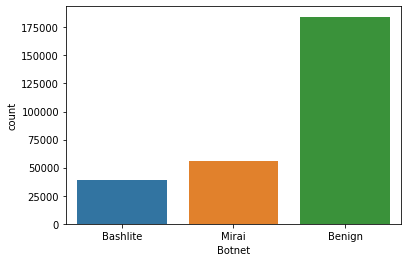

In [116]:
g = sns.countplot(df_ab['Botnet'])
g.set_xticklabels(['Bashlite','Mirai','Benign'])
plt.show()

In [117]:
# class count
class_count_0, class_count_1, class_count_2 = df_ab['Botnet'].value_counts()

# Separate class
class_0 = df_ab[df_ab['Botnet'] == 0]
class_1 = df_ab[df_ab['Botnet'] == 1]
class_2 = df_ab[df_ab['Botnet'] == 2]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

class 0: (39100, 8)
class 1: (56208, 8)
class 2: (184429, 8)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


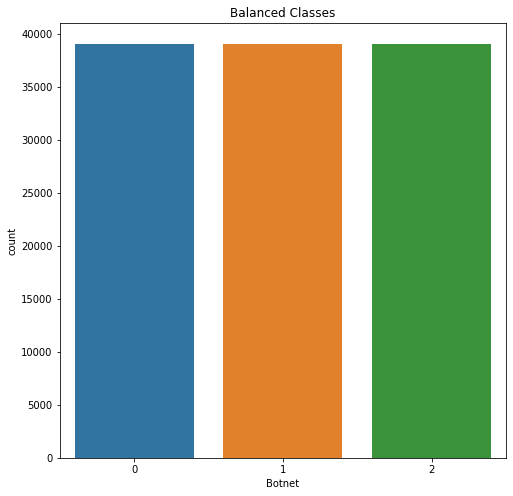

In [118]:
shuffled_df = df_ab.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
bashlite_df = shuffled_df.loc[shuffled_df['Botnet'] == 0]

#Randomly select 492 observations from the non-fraud (majority class)
mirai_df = shuffled_df.loc[shuffled_df['Botnet'] == 1].sample(n=39100,random_state=42)
benign_df = shuffled_df.loc[shuffled_df['Botnet'] == 2].sample(n=39100,random_state=42)

# Concatenate both dataframes again
df_ab = pd.concat([bashlite_df, mirai_df, benign_df])
plt.figure(figsize=(8, 8))
sns.countplot('Botnet', data=df_ab)
plt.title('Balanced Classes')
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(
    df_ab.iloc[:,0:7],df_ab.iloc[:,7], test_size=0.3)

In [120]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('R^2 Value: ', regr.score(X_train,y_train))
print('Coefficients: ',regr.coef_)
print('Intercept:', regr.intercept_)

R^2 Value:  0.8946802854255238
Coefficients:  [ 0.46925605 -0.00951572  0.25191987 -0.06465501  0.45631319  0.10341404
  0.00655166]
Intercept: 1.4677431508929826


In [121]:
from sklearn.metrics import *
pred = regr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test,pred))
print('RMSE: ', mean_squared_error(y_test,pred, squared = False))
print(pred)

MAE:  0.19656427573280533
RMSE:  0.2686743254173118
[1.82610849 0.10489572 1.8783128  ... 1.02275727 0.34915751 0.1165168 ]


In [129]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                                                       class_weight=None, random_state=22, solver='lbfgs', max_iter=200, multi_class= 'multinomial', 
                                                       verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.996135265700483


In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
#import matplotlib.pyplot as plt  
#from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(
 #   df_ab.iloc[:,0:11],df_ab.iloc[:,11], test_size=0.3)
#clf = SVC(random_state=0)
#clf.fit(X_train, y_train)
#SVC(random_state=0)
#plot_confusion_matrix(clf, X_test, y_test)  
#plt.show()  


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00     11762
     Class 2       0.98      0.99      0.99     11702
     Class 3       1.00      0.98      0.99     11726

    accuracy                           0.99     35190
   macro avg       0.99      0.99      0.99     35190
weighted avg       0.99      0.99      0.99     35190

[[11720    42     0]
 [   50 11641    11]
 [    0   181 11545]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


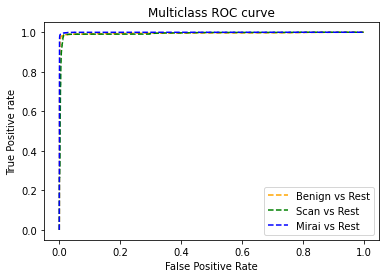

In [61]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    #auc[i] = metrics.roc_auc_score(y_test, pred_prob[:,i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Scan vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Mirai vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [62]:
pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=5))])
pipe_kNN_scaled = Pipeline (steps = [('model',neighbors.KNeighborsClassifier(n_neighbors=16))])
pipe_lr = Pipeline (steps = [ ('model',linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                                                       class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class= 'multinomial', 
                                                       verbose=0, warm_start=False, n_jobs=None, l1_ratio=None))])
pipe_NN = Pipeline (steps = [ ('model',MLPClassifier(learning_rate_init= 0.003, activation= 'relu'))])
pipe_DT = Pipeline (steps = [ ('model',DecisionTreeClassifier(max_depth=3))])
pipe_XG = Pipeline (steps = [('model', XGBClassifier(max_depth=2))])

rmse = 0
mae = 0
Accuracy_score = 0
df_read = pd.DataFrame(columns = ['rmse','mae'])
df_read_as = pd.DataFrame(columns = ['Accuracy Score'])
pipe_list = [pipe_kNN,pipe_kNN_scaled,pipe_lr,pipe_NN,pipe_DT, pipe_XG]
for pipe in pipe_list:
  model = pipe.fit(X_train, y_train)
  pred = model.predict(X_test)
  rmse = mean_squared_error(y_test, pred, squared=False)
  mae = mean_absolute_error(y_test, pred)
  Accuracy_score= accuracy_score(y_test, pred)
  df_read.loc[pipe] = [rmse, mae]
  df_read_as.loc[pipe] = [Accuracy_score]
print(df_read)
print(" ")
print(df_read_as)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


                                                        rmse       mae
(KNeighborsClassifier(algorithm='auto', leaf_si...  0.059121  0.002188
(KNeighborsClassifier(algorithm='auto', leaf_si...  0.080316  0.004064
(LogisticRegression(C=1.0, class_weight=None, d...  0.686574  0.374197
(MLPClassifier(activation='relu', alpha=0.0001,...  0.059838  0.002614
(DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.021323  0.000455
(XGBClassifier(base_score=0.5, booster='gbtree'...  0.014104  0.000142
 
                                                    Accuracy Score
(KNeighborsClassifier(algorithm='auto', leaf_si...        0.998465
(KNeighborsClassifier(algorithm='auto', leaf_si...        0.997130
(LogisticRegression(C=1.0, class_weight=None, d...        0.674396
(MLPClassifier(activation='relu', alpha=0.0001,...        0.997869
(DecisionTreeClassifier(ccp_alpha=0.0, class_we...        0.999545
(XGBClassifier(base_score=0.5, booster='gbtree'...        0.999886
